In [5]:
import dask.dataframe as dd
from dask.diagnostics import ProgressBar

from load_data import custome_read_data

## Plotting library
import matplotlib.pyplot as plt
import seaborn as sns

<div style="font-size: 20px;" class="alert alert-block alert-info">
    <h3>Reading data</h3>
    <hr>
  </div>
</div>

In [6]:
mhealth_data = custome_read_data()

In [19]:
mhealth_data_zero_label = mhealth_data[mhealth_data["activity"] == 0]
mhealth_data_non_zero_label = mhealth_data[mhealth_data["activity"] != 0]

mhealth_data_zero_label =  mhealth_data_zero_label.sample(frac=0.03520715145, random_state=666)
mhealth_data = dd.concat([mhealth_data_zero_label,mhealth_data_non_zero_label ])

<div style="font-size: 20px;" class="alert alert-block alert-info">
    <h3>A Brief glance to data set</h3>
    <hr>
  </div>
</div>

In [20]:
with ProgressBar():
    describe = mhealth_data.describe(include='all').compute()   
describe

[########################################] | 100% Completed |  3.3s


,acc_ch_x,acc_ch_y,acc_ch_z,elec_signal_lead1,elec_signal_lead2,acc_la_x,acc_la_y,acc_la_z,gyr_la_x,gyr_la_y,...,acc_rw_x,acc_rw_y,acc_rw_z,gyr_rw_x,gyr_rw_y,gyr_rw_z,mag_rw_x,mag_rw_y,mag_rw_z,activity
count,373915.000000,373915.000000,373915.000000,373915.000000,373915.000000,373915.000000,373915.000000,373915.000000,373915.000000,373915.000000,...,373915.000000,373915.000000,373915.000000,373915.000000,373915.000000,373915.000000,373915.000000,373915.000000,373915.000000,373915.000000
mean,-7.603396,-0.147731,-0.951126,0.003069,-0.007451,1.768675,-9.132778,-0.730671,0.088851,-0.557614,...,-3.474813,-5.781897,2.381101,-0.210399,-0.416836,0.367548,-0.442127,1.357405,-0.009237,5.662188
std,5.550007,2.731315,4.505146,0.829554,0.844003,4.174055,5.097229,6.353823,0.463556,0.427199,...,5.770037,6.491306,4.142162,0.547529,0.548025,0.523034,33.419508,30.676386,81.241155,3.585867
min,-22.438000,-20.188000,-18.401000,-8.619600,-8.619600,-22.146000,-19.619000,-19.373000,-1.779200,-7.789900,...,-22.345000,-18.972000,-18.238000,-8.339200,-3.568800,-2.504300,-319.030000,-358.130000,-702.570000,0.000000
25%,-9.609425,-0.864182,-1.559200,-0.154890,-0.121400,0.772860,-9.899600,-1.245200,-0.157700,-0.759850,...,-3.201950,-9.092650,0.802465,-0.514710,-0.776180,0.125000,-3.199500,-4.434950,-8.362600,3.000000
50%,-8.520950,0.226125,0.056381,-0.012559,-0.008373,2.207200,-9.511700,0.915980,0.366420,-0.619140,...,-1.928825,-6.145600,2.948600,-0.080392,-0.478440,0.618530,0.896890,0.535560,-0.266935,6.000000
75%,-4.446200,2.046500,3.509700,0.414440,0.418630,4.725200,-7.319100,3.716575,0.712430,-0.258910,...,1.526000,0.750795,6.646825,0.678430,0.295690,1.017200,9.785225,16.444000,20.188750,9.000000
max,19.094000,20.927000,26.196000,8.506500,8.519100,20.044000,21.161000,25.015000,1.710600,1.827400,...,19.801000,21.965000,25.741000,3.268600,1.427100,2.665900,239.690000,335.420000,657.180000,12.000000


<div style="font-size: 20px;"class="alert alert-block alert-info">
    <h3>Class Distribution</h3>
  </div>
</div>

</div>

In [21]:
def makebar(data_frame,
            data_frame_label,
            xlabels,
            xlabels_font_dict,
            bar_title,
            bar_title_font_dict,
            bar_label_font_dict,
            bar_width=0.6,
            percent=True,
            auto_label=True,
            figure_size=(8,4),):
    
    
    percent_string = "%"
    
    fig, ax = plt.subplots(figsize=figure_size,dpi=400)
    ax.axes.get_yaxis().set_ticks([])
    
    ## Set background color
    ax.patch.set_facecolor('white')
    
    
    y_value=[]
    for i in range(len(data_frame[data_frame_label].compute().value_counts())) :
        
        if percent :
            y_value.append(round(data_frame[data_frame_label].compute().value_counts()[i]/len(data_frame) * 100,2))
        else :
            y_value.append(data_frame[data_frame_label].compute().value_counts()[i])
            percent_string=""
    
    rects1 = ax.bar(xlabels, y_value, width=bar_width,color = ["#098386", "#500125"])

    ## Set labels for values on xaxis
    ax.set_xticklabels(xlabels, **xlabels_font_dict,)

    ax.set_title(bar_title,**bar_title_font_dict)
    plt.tight_layout()
    
    ## remove chart frame
    for spine in ax.spines:
        if spine == 'bottom':
            continue
        ax.spines[spine].set_visible(False)
    
    
    def autolabel(rects):
        """Attach a text label above each bar in *rects*, displaying its height."""
        for rect in rects:
            height = rect.get_height()
            ax.annotate(percent_string+'{}'.format(round(height,2)),
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom',**bar_label_font_dict)
    if auto_label :
        autolabel(rects1)

    plt.show()

/Volumes/Media/Ali/Projects/P.08.Apatura/Work (A)/prototype/apatura_env/lib/python3.7/site-packages/ipykernel_launcher.py:35: UserWarning: FixedFormatter should only be used together with FixedLocator


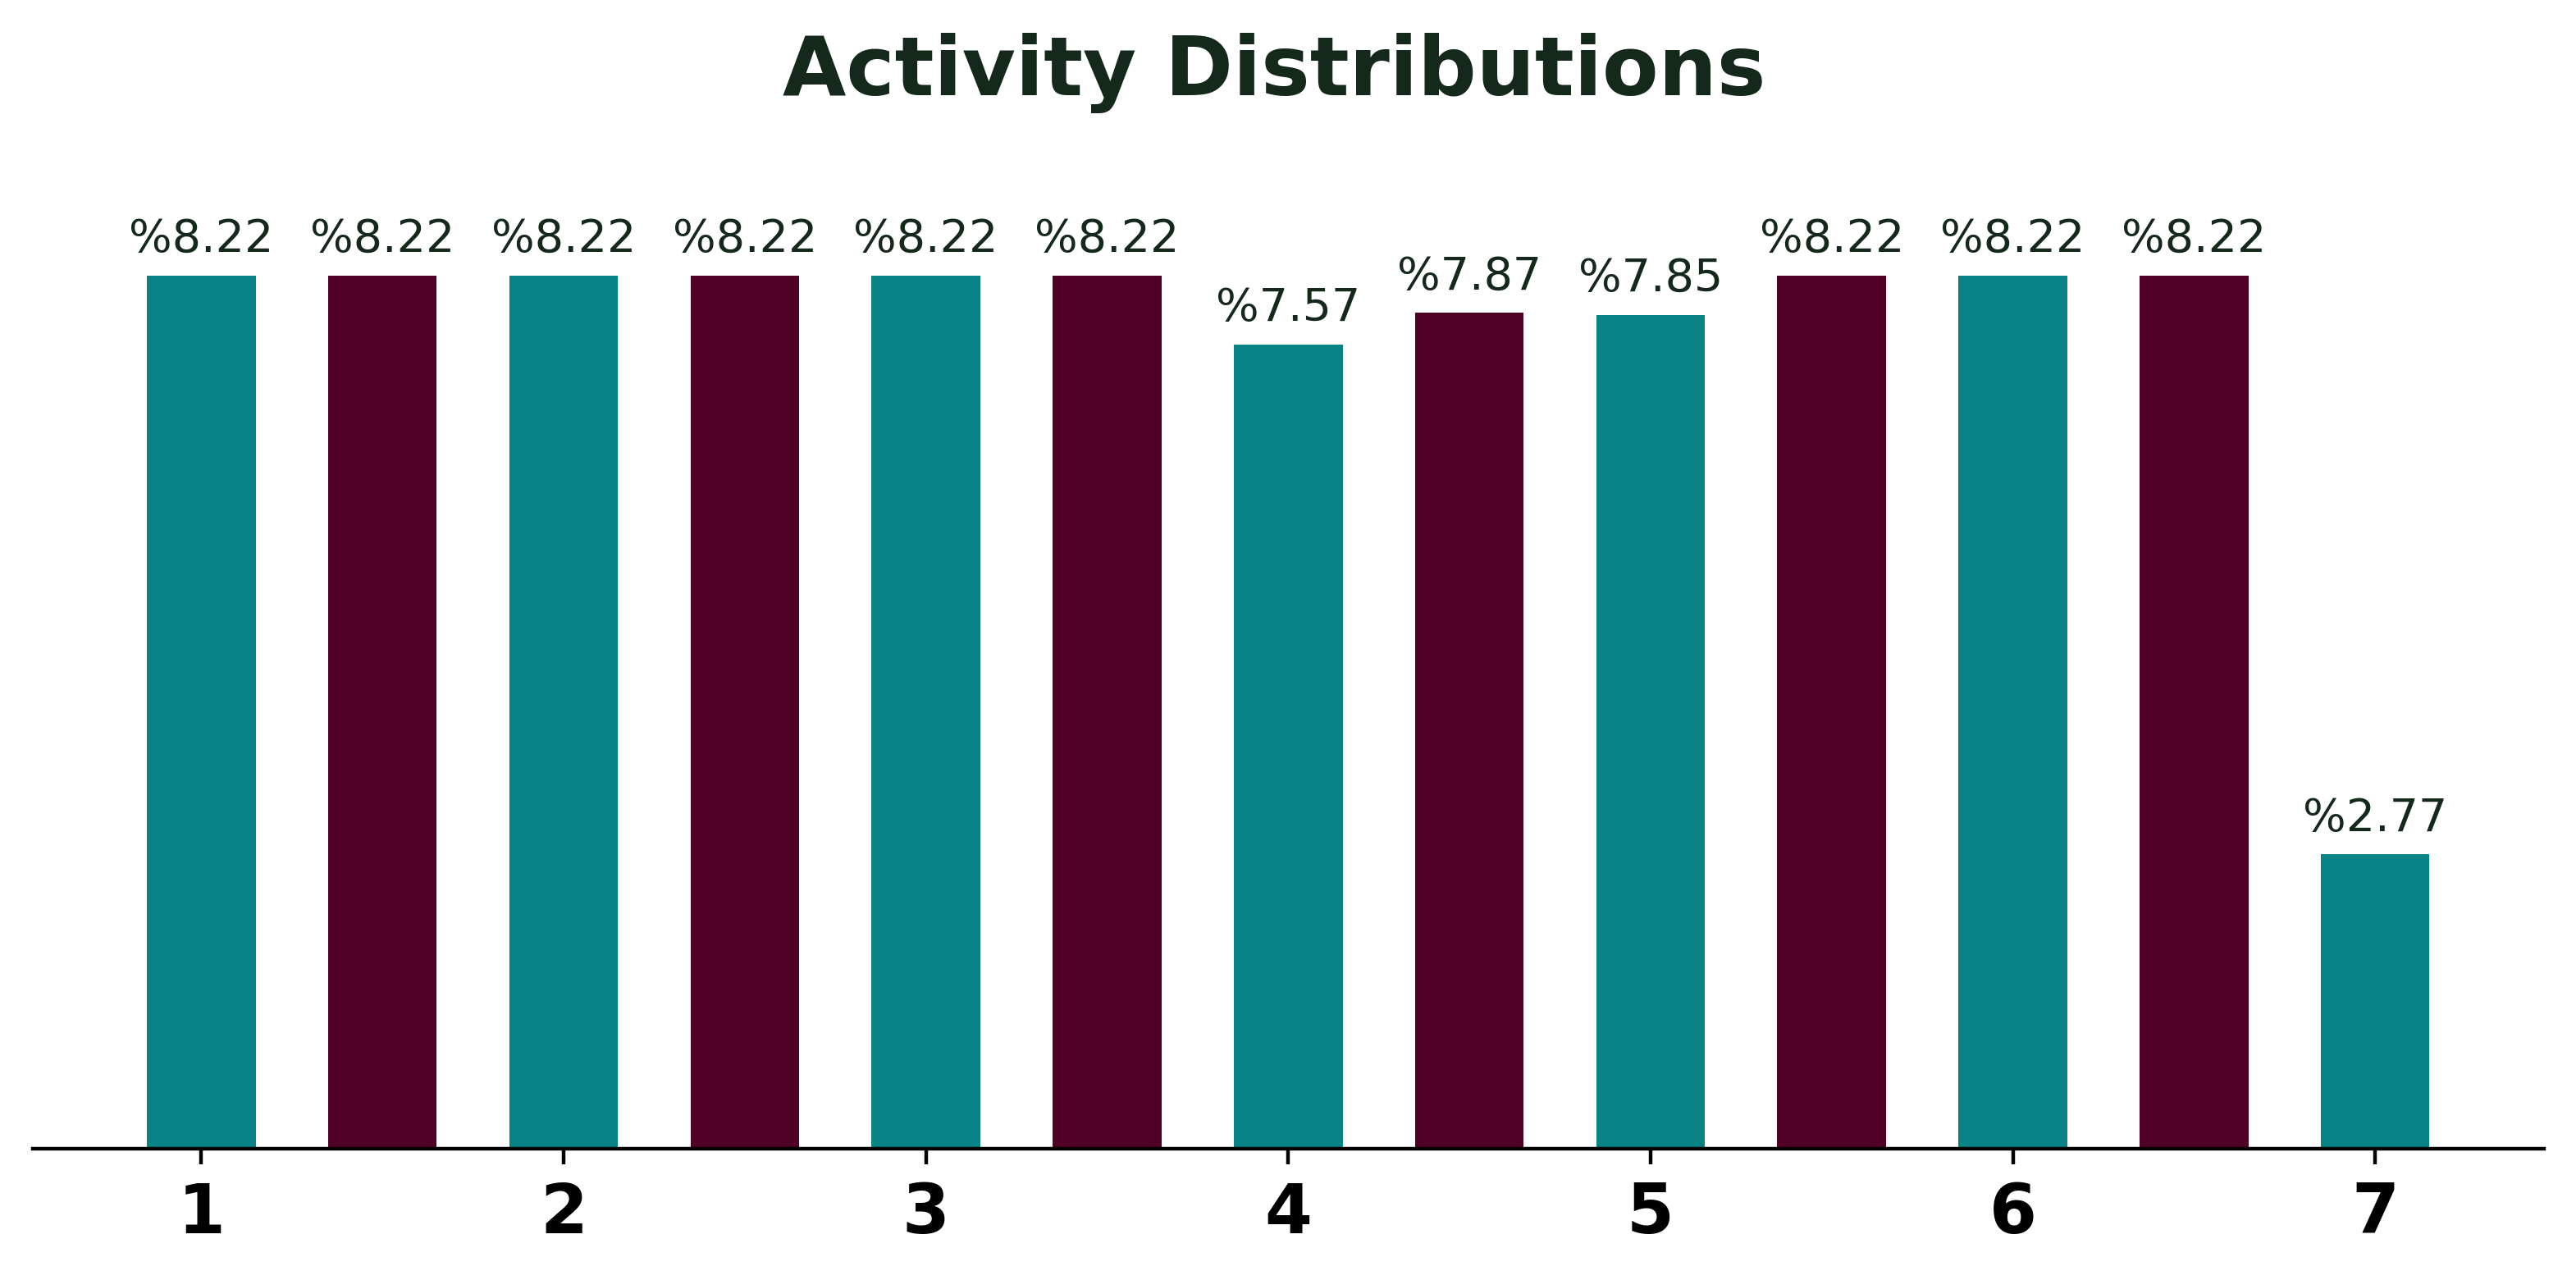

In [22]:
makebar(mhealth_data ,
        'activity',
        xlabels=[0,1,2,3,4,5,6,7,8,9,10,11,12],
        xlabels_font_dict={'family' : "DejaVu Sans",'weight' : 'bold','size':15},
        bar_title='Activity Distributions ',
        bar_title_font_dict = {"weight":'bold', "fontsize":18,"pad":30,"color":'#14291B'},
       bar_label_font_dict={"fontsize":10,"color":"#14291B"})

In [13]:
mhealth_data.activity.value_counts().compute()

0     872550
1      30720
2      30720
3      30720
4      30720
5      30720
9      30720
10     30720
11     30720
7      29441
8      29337
6      28315
12     10342
Name: activity, dtype: int64

In [17]:
missing_values = df.isnull().sum()
with ProgressBar():
    #percent_missing = ((missing_values / caspian_train_.index.size) * 100).compute()
    number_of_missings = missing_values.compute()
number_of_missings

[########################################] | 100% Completed |  1.3s


acc_ch_x    0
acc_ch_y    0
acc_ch_z    0
acc_la_x    0
acc_la_y    0
acc_la_z    0
gyr_la_x    0
gyr_la_y    0
gyr_la_z    0
mag_la_x    0
mag_la_y    0
mag_la_z    0
acc_rw_x    0
acc_rw_y    0
acc_rw_z    0
gyr_rw_x    0
gyr_rw_y    0
gyr_rw_z    0
mag_rw_x    0
mag_rw_y    0
mag_rw_z    0
activity    0
dtype: int64